[**Demo %s**](#demo-rk-converge)

We solve the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$.

In [2]:
using OrdinaryDiffEq
f(u, p, t) = sin((t + u)^2)
tspan = (0.0, 4.0)
u₀ = -1.0
ivp = ODEProblem(f, u₀, tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 4.0)
u0: -1.0

We use a `DifferentialEquations` solver to construct an accurate approximation to the exact solution.

In [3]:
u_ref = solve(ivp, Tsit5(), reltol=1e-14, abstol=1e-14);

Now we perform a convergence study of our two Runge–Kutta implementations.

In [4]:
n = [round(Int, 2 * 10^k) for k in 0:0.5:3]
err = zeros(length(n), 2)
for (k, n) in enumerate(n)
    t, u = FNC.ie2(ivp, n)
    err[k, 1] = norm(u_ref.(t) - u, Inf)
    t, u = FNC.rk4(ivp, n)
    err[k, 2] = norm(u_ref.(t) - u, Inf)
end
@pt :header=["n", "IE2 error", "RK4 error"] [n err]

n,IE2 error,RK4 error
2.0,1.76903,0.820651
6.0,0.512684,0.791925
20.0,0.0240594,0.00081269
63.0,0.00225327,8.06216e-6
200.0,0.000222419,7.60655e-8
632.0,2.22528e-5,7.513e-10
2000.0,2.22177e-6,7.45187e-12


The amount of computational work at each time step is assumed to be proportional to the number of stages. Let's compare on an apples-to-apples basis by using the number of $f$-evaluations on the horizontal axis.

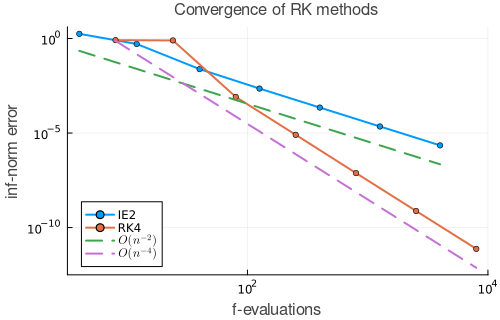

In [5]:
using Plots
plot([2n 4n], err;
    m=3, label=["IE2" "RK4"], legend=:bottomleft,
    xaxis=(:log10, "f-evaluations"),  yaxis=(:log10, "inf-norm error"),
    title="Convergence of RK methods")

plot!(2n, 0.1 * err[end,1] * (n / n[end]) .^ (-2), l=:dash, label=L"O(n^{-2})")
plot!(4n, 0.1 * err[end,2] * (n / n[end]) .^ (-4), l=:dash, label=L"O(n^{-4})")

The fourth-order variant is more efficient in this problem over a wide range of accuracy.